In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

# Load Dataset

In [2]:
data = pd.read_csv('Analysis/005930.KS.csv')
data = data.dropna()
data.head()

Date     Open     High      Low    Close     Adj Close      Volume
0  2016-09-01  31660.0  31760.0  31260.0  31740.0  27374.837891  18790150.0
1  2016-09-02  31900.0  32260.0  31760.0  31940.0  27547.332031   8153000.0
2  2016-09-05  31800.0  32300.0  31700.0  32120.0  27702.576172   8383800.0
3  2016-09-06  32140.0  32900.0  31940.0  32860.0  28340.804688   7660150.0
4  2016-09-07  32960.0  33040.0  32420.0  32420.0  27961.316406   9591850.0

# Compute Mid Price

In [3]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices)/2

# Create Windows

In [13]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])
result = np.array(result)
result.shape

(1172, 51)

# Normalize Data

In [14]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)
    
result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((1055, 50), (117, 50, 1))

# Build a Model

In [19]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50,1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


# Training

In [26]:
model.fit(x_train, y_train,
         validation_data=(x_test, y_test),
         batch_size=10,
         epochs=5)

Epoch 1/5
106/106 [==============================] - 2s 22ms/step - loss: 2.9282e-04 - val_loss: 1.3251e-04
Epoch 2/5
106/106 [==============================] - 2s 22ms/step - loss: 2.7842e-04 - val_loss: 1.0704e-04
Epoch 3/5
106/106 [==============================] - 2s 22ms/step - loss: 2.8969e-04 - val_loss: 7.3820e-05
Epoch 4/5
106/106 [==============================] - 2s 22ms/step - loss: 2.9318e-04 - val_loss: 6.7214e-05
Epoch 5/5
106/106 [==============================] - 2s 22ms/step - loss: 2.8866e-04 - val_loss: 7.8941e-05


# Prediction

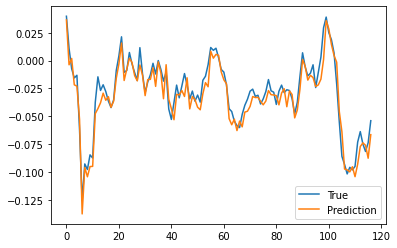

In [21]:
# pred = model.predict(x_test)

# fig = plt.figure(facecolor='white')
# ax = fig.add_subplot(111)
# ax.plot(y_test, label='True')
# ax.plot(pred, label='Prediction')
# ax.legend()
# plt.show()

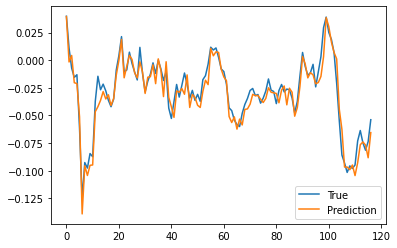

In [27]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white')
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()